In [1]:
from rnamodif.data_utils.datamap import experiment_files
experiment_files.keys()

dict_keys(['5eu_2022_nia', 'UNM_2022_nia', '5eu_2020_nia', 'UNM_2020_nia', 'remdesivir_33_covid', 'ac4C_10_covid', '2-OmeATP_10_covid', 'remdesivir_0_covid', 's4U_33_covid', 's4U_5_covid', 'm5C_10_covid', 'm5C_5_covid', '2-OmeATP_0_covid', 's4U_0_covid', 'm6A_33_covid', 'ac4C_33_covid', '2-OmeATP_5_covid', 'remdesivir_5_covid', 's4U_10_covid', 'm5C_0_covid', 'm6A_5_covid', 'm6A_0_covid', 'ac4C_0_covid', 'm6A_10_covid', 'm5c_novoa', 'm6a_novoa_1', 'm6a_novoa_2', 'UNM_novoa_1', 'UNM_novoa_2', 'UNM_novoa_short', '5eu_nanoid_24h', '5eu_nanoid_1h', '5eu_nanoid_mix', '5eu_nanoid_neg', 'empty'])

In [1]:
import pickle
with open('/home/jovyan/RNAModif/rnamodif/util_notebooks/2022_chr_split.pickle', 'rb') as handle:
    split_dict = pickle.load(handle)

In [2]:
with open('/home/jovyan/tombo_test/tombo_modreads_2022.pickle', 'rb') as handle:
    mod_reads = pickle.load(handle)

In [17]:
# split_dict['5eu_2022_nia_chr1']
id_to_path_map = {}
for path in split_dict['5eu_2022_nia_chr2-X']:
    id_to_path_map[path.stem] = path
readids = [p.stem for p in split_dict['5eu_2022_nia_chr2-X']]
intersection = list(set(readids) & set(mod_reads))
filtered_readpaths_chr2x = [id_to_path_map[readid] for readid in intersection]

In [18]:
# split_dict['5eu_2022_nia_chr1']
id_to_path_map = {}
for path in split_dict['5eu_2022_nia_chr1']:
    id_to_path_map[path.stem] = path
readids = [p.stem for p in split_dict['5eu_2022_nia_chr1']]
intersection = list(set(readids) & set(mod_reads))
filtered_readpaths_chr1 = [id_to_path_map[readid] for readid in intersection]

In [20]:
split_dict['5eu_2022_nia_chr2-X'] = filtered_readpaths_chr2x
split_dict['5eu_2022_nia_chr1'] = filtered_readpaths_chr1



In [21]:
with open('2022_chr_split_tombofilter.pickle', 'wb') as handle:
    pickle.dump(split_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
experiment_files['5eu_2022_nia'][0]

PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/20220303_hsa_dRNA_HeLa_5EU_polyA_REL5_2/runs/20220303_1920_MN36569_FAR89595_b610d332/fast5/FAR89595_30596c4a_14.fast5')

In [1]:
from rnamodif.data_utils.split_methods import get_kfold_splits, get_fullvalid_split, get_valid_portions
splits = get_kfold_splits(
        pos_exps=['5eu_2022_nia'],
        neg_exps=['UNM_2022_nia'], 
        total_k=5, 
        current_k=0
)+get_fullvalid_split()(pos_files=['5eu_2020_nia', '5eu_nanoid_24h', '5eu_nanoid_1h', '5eu_nanoid_mix'], neg_files=['UNM_2020_nia','5eu_nanoid_neg'])
for split in splits:
    print(split['exp'])

5eu_2022_nia
UNM_2022_nia
5eu_2020_nia
5eu_nanoid_24h
5eu_nanoid_1h
5eu_nanoid_mix
UNM_2020_nia
5eu_nanoid_neg


In [14]:
from rnamodif.data_utils.dataloading import get_valid_dataset_fullreads
dset = get_valid_dataset_fullreads(splits, per_dset_read_limit=200)

Generating valid dataset


100%|██████████| 8/8 [00:12<00:00,  1.57s/it]


In [17]:
import numpy as np
d = {}
for i in range(len(dset)):
    x,y,identifier = dset.__getitem__(i)
    if(identifier['exp'] not in d.keys()):
        d[identifier['exp']] = []
    d[identifier['exp']].append(identifier['readid'])

for k in d.keys():
    un = np.unique(d[k])
    print(len(un), len(d[k]), k)

200 1903 5eu_2022_nia
200 1981 5eu_2020_nia
200 3147 5eu_nanoid_24h
200 3539 5eu_nanoid_1h
200 4622 5eu_nanoid_mix
200 2374 UNM_2022_nia
200 1679 UNM_2020_nia
200 6570 5eu_nanoid_neg


In [ ]:
vocab= [ '_', 'A', 'C', 'G', 'T' ]
seq = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 3, 3, 0, 0,
        0, 0, 0, 4, 4, 0, 3, 3, 0, 4, 4, 0, 0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0, 4,
        4, 0, 3, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 3, 3,
        3, 3, 0, 0, 0, 0, 0, 0, 4, 4, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
        3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 4, 0, 0, 3, 0, 0, 4, 0, 0, 0, 4, 0, 4, 4,
        0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0,
        0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0,
        0, 0, 4, 4, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0,
        0, 0, 4, 4, 0, 2, 2, 0, 0, 2, 2, 4, 4, 4, 0, 0, 0, 4, 0, 3, 3, 0, 0, 3,
        3, 0, 0, 0, 3, 3, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 3,
        3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
''.join([vocab[i] for i in seq])

'_____________T___G__G___A_____________CC_G__GG_____TT_GG_TT___CC_G_____TT_GG_AA_________AA________________TT__TT___TT_GGGG______TT_A____G__A___________________________GG_AA___________________________A_CT__G__T___T_TT_G__G__G___G________TT___T__________________________________________________________________________________________TT____TT__GG_____________TT___TT_CC__CCTTT___T_GG__GG___GGG__AA_____T___T__GG___T_______'

In [36]:
import torch
import torchmetrics
acc = torchmetrics.classification.BinaryAccuracy(threshold=0.5, average='weighted')

p = torch.tensor([0.6,0.6,0.6,0.6,0.6])
l = torch.tensor([1,1,1,1,0])
acc(p,l)

s = torchmetrics.functional.specificity(p,l)
r = torchmetrics.functional.recall(p,l)
s+r/2

torch.cat([p,p])

tensor([0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000, 0.6000,
        0.6000])

In [148]:
import pandas as pd
dic = {'read1':True, 'read2':False}
res = {'ids':[], 'preds':[]}
for k,v in dic.items():
    res['ids'].append(k)
    res['preds'].append(v)
pd.DataFrame.from_dict(res)


,ids,preds
0,read1,True
1,read2,False


In [13]:
from rnamodif.data_utils.dataloading2 import nanopore_datamodule
from rnamodif.data_utils.split_methods import get_kfold_splits, get_fullvalid_split, get_valid_portions
import torch

dm = nanopore_datamodule(
    splits = get_kfold_splits(
        pos_exps=['m6a_novoa_1', 'm6a_novoa_2'],
        neg_exps=['UNM_novoa_1', 'UNM_novoa_2', 'UNM_novoa_short'], 
        total_k=5, 
        current_k=0)
    ,
    verbose=1, 
    batch_size=32, 
    valid_limit=100, 
    workers=1,
    window=4096,
    normalization='zscore',
)
dm.setup()
dloader = dm.train_dataloader()



In [132]:
xbatch = next(iter(dloader))[0]

In [133]:
signal_example = xbatch[0][0]


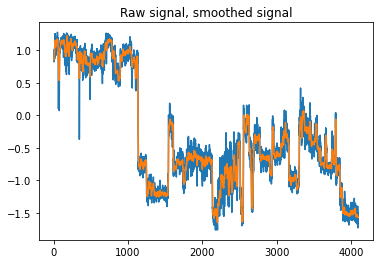

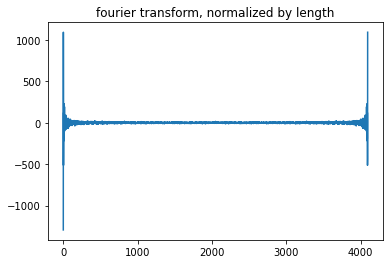

Text(0.5, 1.0, 'fourier magnitude, normalized by length')

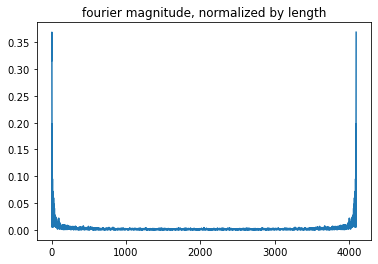

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import savgol_filter

# Compute the discrete Fourier transform of the nanopore signal
fourier_transform = np.fft.fft(signal_example)

# Shift the zero-frequency component to the center of the spectrum
# fourier_transform = np.fft.fftshift(fourier_transform)

# Compute the magnitude of the Fourier transform
fourier_magnitude = np.abs(fourier_transform)

# Compute the phase of the Fourier transform
# fourier_phase = np.angle(fourier_transform)
np.fft.fft(signal_example)
plt.plot(signal_example)
plt.title('Raw signal, smoothed signal')
plt.plot(savgol_filter(signal_example, window_length=10, polyorder=1))

plt.show()
plt.plot(fourier_transform)
plt.title('fourier transform, normalized by length')
plt.show()
# plt.plot(stats.zscore(fourier_magnitude))
plt.plot(fourier_magnitude/4096)
plt.title('fourier magnitude, normalized by length')


# plt.show()
# plt.plot(fourier_phase)

torch.Size([201, 51])


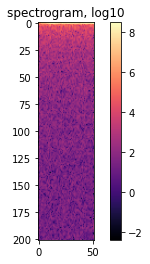

In [142]:
import numpy as np
from scipy import signal
from torchaudio.transforms import Spectrogram, MelSpectrogram

def nanopore_stft(signal_input: np.ndarray) -> np.ndarray:
    # Compute the spectrogram of the signal using the scipy signal library
    # _, _, spectrogram = signal.spectrogram(signal_input, nperseg=4096, noverlap=256, nfft=4096)
    _, _, spectrogram = signal.stft(signal_input)
    return spectrogram

def nanopore_spectrogram(signal_input: np.ndarray) -> np.ndarray:
    # Compute the spectrogram of the signal using the scipy signal library
    _, _, spectrogram = signal.spectrogram(signal_input, nperseg=4096, noverlap=256, nfft=4096)
    # Return the spectrogram
    
    return spectrogram

signal_example_orig = xbatch[0][0]
signal_example = signal_example_orig
# signal_example = savgol_filter(signal_example_orig, window_length=10, polyorder=1)
signal_example = torch.Tensor(np.random.normal(0,1,10000).cumsum())

# spec = nanopore_spectrogram(signal_example.numpy())
# print(spec.shape)
# plt.imshow(spec)
# plt.show()

# power, freq, time, im = plt.specgram(signal_example)
# im
res = Spectrogram()(signal_example)
# res = MelSpectrogram(n_mels=64, hop_length=512, n_fft=1024)(signal_example)
# res = MelSpectrogram()(signal_example)

print(res.size())
# plt.plot(res)
plt.imshow(np.log10(res), cmap='magma')
plt.title('spectrogram, log10')
# plt.imshow(res, cmap='magma')

# plt.show()
# res
# power, freq, time, im = plt.specgram(signal_example)
plt.colorbar()

# plt.show()
# plt.imshow(power)
# plt.colorbar()
# pw = np.array(power)
# pw.shape
# plt.imshow(pw)

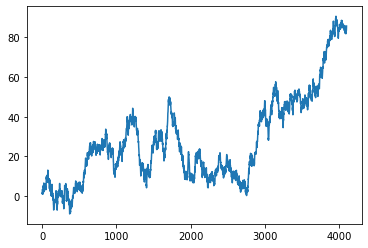

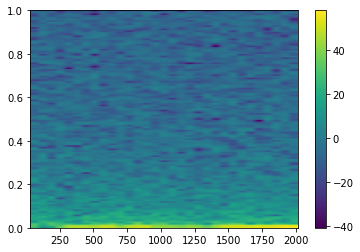

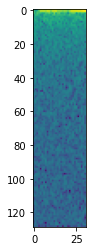

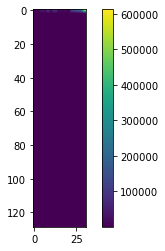

In [136]:
x = np.random.normal(0,1,4096).cumsum()
plt.plot(x)
plt.show()
values, _, _, im = plt.specgram(x)
# plt.imshow(im)
plt.colorbar()

plt.show()
plt.imshow(np.log10(values))
plt.show()
plt.imshow(values)

plt.colorbar()


In [6]:
signal_example.size()

torch.Size([4096])

In [2]:
from rnamodif.architectures.cnn_model2d import CNN2d
import torch
x = torch.rand(32,1, 4096)
CNN2d(learning_rate=1e-3)(x).size()


torch.Size([32, 1])

In [60]:
from rnamodif.architectures.cnn_model import CNN
x = torch.tensor(fourier_magnitude, dtype=torch.float32).reshape(-1,1,345)
CNN(learning_rate=1e-3, base_filters=64, kernel_size=3, n_block=3)(x)


tensor([[-0.0424],
        [-0.0515],
        [-0.0283],
        [-0.0285],
        [-0.0239],
        [-0.0474],
        [-0.0016],
        [-0.0114],
        [ 0.0457],
        [-0.0587],
        [-0.0220],
        [ 0.0479],
        [-0.0567],
        [-0.0395],
        [ 0.0512],
        [-0.0136],
        [ 0.0538],
        [-0.0474],
        [ 0.0481],
        [-0.0481],
        [ 0.0845],
        [ 0.0442],
        [ 0.0218],
        [-0.0292],
        [ 0.0491],
        [-0.0344],
        [-0.0292],
        [-0.0498],
        [ 0.0382],
        [-0.0207],
        [-0.0625],
        [ 0.0470]], grad_fn=<AddmmBackward0>)

In [1]:
from rnamodif.data_utils.split_methods import get_kfold_splits, get_fullvalid_split, get_valid_portions

splits = get_kfold_splits(
    pos_exps=['m6A_5_covid', 'm6a_novoa_1', 'm6a_novoa_2', 'm6A_33_covid','m6A_10_covid'],
    neg_exps=['m6A_0_covid', 'UNM_novoa_1', 'UNM_novoa_2', 'UNM_novoa_short'], 
    total_k=5, 
    current_k=0
)
for s in splits:
    print(s.keys())
    
print('_')
for s in get_valid_portions(splits):
    print(s.keys())
# print(splits[0])

dict_keys(['exp', 'train_pos_files', 'valid_pos_files'])
dict_keys(['exp', 'train_pos_files', 'valid_pos_files'])
dict_keys(['exp', 'train_pos_files', 'valid_pos_files'])
dict_keys(['exp', 'train_pos_files', 'valid_pos_files'])
dict_keys(['exp', 'train_pos_files', 'valid_pos_files'])
dict_keys(['exp', 'train_neg_files', 'valid_neg_files'])
dict_keys(['exp', 'train_neg_files', 'valid_neg_files'])
dict_keys(['exp', 'train_neg_files', 'valid_neg_files'])
dict_keys(['exp', 'train_neg_files', 'valid_neg_files'])
_
dict_keys(['exp', 'valid_pos_files'])
dict_keys(['exp', 'valid_pos_files'])
dict_keys(['exp', 'valid_pos_files'])
dict_keys(['exp', 'valid_pos_files'])
dict_keys(['exp', 'valid_pos_files'])
dict_keys(['exp', 'valid_neg_files'])
dict_keys(['exp', 'valid_neg_files'])
dict_keys(['exp', 'valid_neg_files'])
dict_keys(['exp', 'valid_neg_files'])


In [36]:
# from rnamodif.architectures.rodan_pretrained import RodanPretrained
from rnamodif.architectures.rodan_pretrained_MIL import RodanPretrainedMIL
from rnamodif.architectures.rodan_pretrained_modcaller import RodanPretrainedModcaller



import torch
model = RodanPretrainedModcaller(pretrained_lr=5e-5, my_layers_lr=1e-3, warmup_steps = 10000).cuda()


In [126]:
from torch.nn import functional as F

out = model(torch.rand(32,1,4096).float().cuda())
out = torch.swapaxes(out,0,1).swapaxes(1,2)
# out = torch.log(out)
print(out.size())
# loss = torch.nn.CrossEntropyLoss(out, torch.nn.Softmax()(out))
soft = torch.nn.Softmax()
# soft = torch.nn.KLDivLoss()

loss = torch.nn.CrossEntropyLoss()(out, out.softmax(dim=-2))
# loss = torch.nn.KLDivLoss()(out, out.softmax(dim=-2))
# print(out.softmax(dim=-1))
# print(out.softmax(dim=-2))
print(loss)


torch.Size([32, 5, 420])
tensor(0.6034, device='cuda:0')


In [3]:
from rnamodif.data_utils.split_methods import get_kfold_splits, get_fullvalid_split, get_valid_portions
get_valid_portions(get_kfold_splits(
        pos_exps=['m6A_10_covid','m6A_5_covid','m6a_novoa_1', 'm6a_novoa_2'],
        neg_exps=['UNM_novoa_1', 'UNM_novoa_2', 'UNM_novoa_short'], 
        total_k=5, 
        current_k=0))

[{'exp': 'm6A_10_covid',
  'valid_pos_files': [PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/m6A_10/fast5/batch4.fast5'),
   PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/m6A_10/fast5/batch13.fast5'),
   PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/m6A_10/fast5/batch19.fast5'),
   PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/m6A_10/fast5/batch23.fast5'),
   PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/m6A_10/fast5/batch32.fast5'),
   PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/m6A_10/fast5/batch2.fast5')]},
 {'exp': 'm6A_5_covid',
  'valid_pos_files': [PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/m6A_5/fast5/batch25.fast5'),
   PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/m6A_5/fast5/batch23.fast5'),
   PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/m6A_5/fast5/batch18.fast5'),
   PosixPath('/home/jovyan/local_store/store/seq/ont/experime

In [2]:
# for l in model.children():
#     for subl in l.children():
#         print(subl)
#         print([x.requires_grad for x in list(subl.parameters())])

In [1]:
from rnamodif.data_utils.dataloading2 import nanopore_datamodule
from rnamodif.data_utils.split_methods import kfold_split
import pickle

# with open(f'2022_blacklist_positives','rb') as f:
#     bl = pickle.load(f)
    
split_method=kfold_split(total_k=5, current_k=0),
s1 = split_method(pos_files='5eu_2022_nia', neg_files='UNM_2022_nia')
s2 = split_method(pos_files='5eu_2020_nia', neg_files='UNM_2020_nia')
dm = nanopore_datamodule(
    splits = [s1,s2],
    verbose=0, 
    batch_size=16, 
    valid_limit=10000, 
    workers=16,
    window=4096,
    # read_blacklist = bl
)
dm.setup()
train_loader=iter(dm.train_dataloader())

In [23]:
from torchmetrics import ConfusionMatrix
from torchmetrics.classification import BinaryConfusionMatrix
import torch
target = torch.tensor([1, 1, 0, 0, 1])
preds = torch.tensor([0, 0, 0, 0, 1])
confmat = BinaryConfusionMatrix(normalize='true')
confmat2 = BinaryConfusionMatrix()

cm2 = confmat2(preds, target)
print(cm2)
cm = confmat(preds, target)
print(cm)
cm[0][0] # True negatives
cm[1][0] # False negatives
cm[0][1] # False positives
cm[1][1] # True positives


tensor([[2, 0],
        [2, 1]])
tensor([[1.0000, 0.0000],
        [0.6667, 0.3333]])


tensor(0.3333)

In [14]:
len([['a'],['b']] + [['c'],['d']])

4

In [12]:
print(sum(next(train_loader)[1])/dm.batch_size)
next(train_loader)[1]


tensor([0.6250])


tensor([[0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [10]:
from rnamodif.data_utils.generators import *
def get_gen(num):
    while True:
        yield num

gen = uniform_gen([get_gen(1), get_gen(2), get_gen(4)])
r = []
for _ in range(20):
    r.append(next(gen))
sorted(r)

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4]

In [67]:
a = sorted(experiment_files['5eu_2022_nia'])[:10]
b = sorted(experiment_files['5eu_2022_nia'])[8:15]
len(set(a).intersection(b))

2

In [56]:
import numpy as np

exp_to_indexfunc = {}
for k in experiment_files.keys():
    if 'nia' in k:
        exp_to_indexfunc[k] = lambda x: int(x.stem.split('_')[-1])
    elif 'covid' in k:
        exp_to_indexfunc[k] = lambda x: int(x.stem[5:])
    elif 'm6a_novoa' in k:
        exp_to_indexfunc[k] = lambda x: int(str(x.parent.stem) + str(x.stem.split('_')[-6]) + str(x.stem.split('_')[-4]) + str(x.stem.split('_')[-2]))
        # exp_to_indexfunc[k] = lambda x: int(x.parent.stem + x.stem.split('_')[-2])
        
    elif 'novoa' in k:
        exp_to_indexfunc[k] = lambda x: int(x.stem.split('_')[-1])
    else:
        exp_to_indexfunc[k] = None
    

def get_experiment_sort(exp_name): 
    index_func = exp_to_indexfunc[exp_name]
    # print(exp_name)
    if(not index_func):
        raise Exception(f'Missing sorting function for {exp_name}')
    return index_func

def test_sorting(exp):
    print(exp)
    srt = sorted(experiment_files[exp], key=get_experiment_sort(exp))
    sorted_indicies = [int(get_experiment_sort(exp)(x)) for x in srt]
    
    assert len(np.unique(sorted_indicies)) == len(sorted_indicies), f'{len(np.unique(sorted_indicies))},{len(sorted_indicies)}'
    assert np.equal(np.unique(sorted_indicies),np.sort(sorted_indicies)).all()
    for i in range(len(sorted_indicies)-1):
        assert sorted_indicies[i] < sorted_indicies[i+1], f'{sorted_indicies[i]}, {sorted_indicies[i+1]}'

    print(exp, 'OK')
    
for exp in experiment_files.keys():
    test_sorting(exp)


5eu_2022_nia
5eu_2022_nia OK
UNM_2022_nia
UNM_2022_nia OK
5eu_2020_nia
5eu_2020_nia OK
UNM_2020_nia
UNM_2020_nia OK
remdesivir_33_covid
remdesivir_33_covid OK
ac4C_10_covid
ac4C_10_covid OK
2-OmeATP_10_covid
2-OmeATP_10_covid OK
remdesivir_0_covid
remdesivir_0_covid OK
s4U_33_covid
s4U_33_covid OK
s4U_5_covid
s4U_5_covid OK
m5C_10_covid
m5C_10_covid OK
m5C_5_covid
m5C_5_covid OK
2-OmeATP_0_covid
2-OmeATP_0_covid OK
s4U_0_covid
s4U_0_covid OK
m6A_33_covid
m6A_33_covid OK
ac4C_33_covid
ac4C_33_covid OK
2-OmeATP_5_covid
2-OmeATP_5_covid OK
remdesivir_5_covid
remdesivir_5_covid OK
s4U_10_covid
s4U_10_covid OK
m5C_0_covid
m5C_0_covid OK
m6A_5_covid
m6A_5_covid OK
m6A_0_covid
m6A_0_covid OK
ac4C_0_covid
ac4C_0_covid OK
m6A_10_covid
m6A_10_covid OK
m5c_novoa
m5c_novoa OK
m6a_novoa_1


AssertionError: 134362,134374

In [54]:
print(experiment_files['m6a_novoa_1'][:5])
experiment_files['m6a_novoa_1'][0].stem.split('_')

[PosixPath('/home/jovyan/local_store/novoa_data/RNAAB090763_m6A_fast5/fast5/7/GXB01170_20180726_FAH84534_GA20000_sequencing_run_RNAAB090763_92733_read_29569_ch_174_strand.fast5'), PosixPath('/home/jovyan/local_store/novoa_data/RNAAB090763_m6A_fast5/fast5/7/GXB01170_20180726_FAH84534_GA20000_sequencing_run_RNAAB090763_92733_read_97764_ch_35_strand.fast5'), PosixPath('/home/jovyan/local_store/novoa_data/RNAAB090763_m6A_fast5/fast5/7/GXB01170_20180726_FAH84534_GA20000_sequencing_run_RNAAB090763_92733_read_39689_ch_165_strand.fast5'), PosixPath('/home/jovyan/local_store/novoa_data/RNAAB090763_m6A_fast5/fast5/7/GXB01170_20180726_FAH84534_GA20000_sequencing_run_RNAAB090763_92733_read_41569_ch_87_strand.fast5'), PosixPath('/home/jovyan/local_store/novoa_data/RNAAB090763_m6A_fast5/fast5/7/GXB01170_20180726_FAH84534_GA20000_sequencing_run_RNAAB090763_92733_read_46373_ch_434_strand.fast5')]


['GXB01170',
 '20180726',
 'FAH84534',
 'GA20000',
 'sequencing',
 'run',
 'RNAAB090763',
 '92733',
 'read',
 '29569',
 'ch',
 '174',
 'strand']

In [20]:
np.unique([1,3,2,4,5,5,1])

array([1, 2, 3, 4, 5])

In [4]:
for k,v in experiment_files.items():
    print(k, len(v))

5eu_2022 275
UNM_2022 520
5eu_2020 150
UNM_2020 203
remdesivir_33 5
ac4C_10 18
2-OmeATP_10 11
remdesivir_0 28
s4U_33 21
s4U_5 31
m5C_10 24
m5C_5 24
2-OmeATP_0 11
s4U_0 28
m6A_33 22
ac4C_33 15
2-OmeATP_5 15
remdesivir_5 1
s4U_10 25
m5C_0 20
m6A_5 28
m6A_0 30
ac4C_0 15
m6A_10 33
m5c_novoa 104
m6a_novoa_1 134374
m6a_novoa_2 638860
UNM_novoa_1 66736
UNM_novoa_2 846595
5eu_nanoid_24h 177088
5eu_nanoid_1h 114106
5eu_nanoid_mix 138119
5eu_nanoid_neg 216906
empty 0


In [8]:
experiment_files['5eu_2022']

[PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/20220303_hsa_dRNA_HeLa_5EU_polyA_REL5_2/runs/20220303_1920_MN36569_FAR89595_b610d332/fast5/FAR89595_30596c4a_14.fast5'),
 PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/20220303_hsa_dRNA_HeLa_5EU_polyA_REL5_2/runs/20220303_1920_MN36569_FAR89595_b610d332/fast5/FAR89595_30596c4a_193.fast5'),
 PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/20220303_hsa_dRNA_HeLa_5EU_polyA_REL5_2/runs/20220303_1920_MN36569_FAR89595_b610d332/fast5/FAR89595_30596c4a_116.fast5'),
 PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/20220303_hsa_dRNA_HeLa_5EU_polyA_REL5_2/runs/20220303_1920_MN36569_FAR89595_b610d332/fast5/FAR89595_30596c4a_254.fast5'),
 PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/20220303_hsa_dRNA_HeLa_5EU_polyA_REL5_2/runs/20220303_1920_MN36569_FAR89595_b610d332/fast5/FAR89595_30596c4a_41.fast5'),
 PosixPath('/home/jovyan/local_store/store/seq/ont/experiments/20220303_hsa_d

In [1]:
# from rnamodif_src.data_utils.datamap import experiment_files, experiments_dict
from pathlib import Path

list(Path('/home/jovyan/local_store').iterdir())
# Path().resolve()

[PosixPath('/home/jovyan/local_store/RNA010220191_m5C_fast5.tar.gz.1'),
 PosixPath('/home/jovyan/local_store/.ipynb_checkpoints'),
 PosixPath('/home/jovyan/local_store/store'),
 PosixPath('/home/jovyan/local_store/RNA010220191_m5C_fast5')]

In [11]:
tot = 0
for _ in range(100):
    x, y = next(train_loader)
    tot+=sum(y)
    
tot/100

tensor([7.8000])

In [7]:
from rnamodif.data_utils.datamap import experiment_files
experiment_files.keys()

dict_keys(['pos_2022', 'neg_2022', 'pos_2020', 'neg_2020', 'remdesivir_33', 'ac4C_10', '2-OmeATP_10', 'remdesivir_0', 's4U_33', 's4U_5', 'm5C_10', 'm5C_5', '2-OmeATP_0', 's4U_0', 'm6A_33', 'ac4C_33', '2-OmeATP_5', 'remdesivir_5', 's4U_10', 'm5C_0', 'm6A_5', 'm6A_0', 'ac4C_0', 'm6A_10', 'm5c_novoa'])

In [8]:
import pickle
total= {}
for k in range(5):
    with open(f'mislabeled_results_2022_{k}of5','rb') as f:
        results = pickle.load(f)
        total.update(results)
        print(len(results))
        
len(total)

614436
611264
614487
615032
611560


3066779

In [10]:
for k,v in total.items():
    total[k] = sum(v)/len(v)

In [ ]:
pos_mis = [v for k,v in total.items() if int(k[-2]) == 1]
neg_mis = [v for k,v in total.items() if int(k[-2]) == 0]
thresh = 0.99
mis_p = sum([p >= thresh for p in pos_mis])/len(pos_mis)
mis_n = sum([p >= thresh for p in neg_mis])/len(neg_mis)
print(mis_p)
print(format(mis_n, 'f'))

0.7306490371922131
0.000047


1041589

In [29]:
pos_mis = [k[:-3] for k,v in total.items() if (int(k[-2]) == 1 and v>=0.99)]
# pos_mis
len(pos_mis)

761036

In [28]:
import numpy as np
len(np.unique(pos_mis))


761036

In [31]:
with open(f'2022_blacklist_positives','wb') as f:
    pickle.dump(pos_mis, f)

In [32]:
with open(f'2022_blacklist_positives','rb') as f:
    bl = pickle.load(f)

In [35]:
bl

['a3eb87cf-4af1-4c7c-8af1-fb8032f154bc',
 'b1dcf6f8-030f-4864-aea4-fc34c02699b6',
 '300d1150-dcef-4bac-b601-8c9b2ba913b8',
 '4293a94f-7257-4f2d-8884-7ba365678ed6',
 '75d2b3e0-b7aa-4cf4-8219-d6c79c18d542',
 'bf5c0ba5-b264-414e-be2e-60595130830f',
 'c5d05fc8-4d01-4843-a2b1-af296dd9609e',
 '6013ba7b-028f-4ba3-a0e3-8a83b4215035',
 '1fb5be21-04ed-4f06-a7d6-4065bb894890',
 'ba5095bd-6fc0-4ae4-904b-623e304441cc',
 '17eb3972-bba8-40c6-8bb4-b87208deefcb',
 '2b1d0252-7b4c-405d-8eaa-18975f85a2cc',
 '0bdd35e6-a398-488a-affb-9a468e7124a4',
 'f3a0c0e1-bf60-4443-9052-a299fcea9a06',
 '37edc7d0-91fc-4123-bf2b-8f66785c7cf8',
 'c33cc6ad-fad8-42ae-be4a-b4f68c3d320c',
 '030ac48c-50cd-4350-a751-1db2e624d29b',
 'ca019eea-8171-4968-adfd-2b44a5b418fb',
 'd98bf59d-1dde-4b8b-885f-08c6aa90ac23',
 '8a9e9a2a-44f7-40ff-97b7-c8f62b2f431e',
 '8d52942a-3c74-4bfb-858a-5cf5f6fb5614',
 '15b4d2a7-d1dd-40dd-8188-55437976a526',
 '3012540e-68e2-486b-aa66-d154ac860e76',
 '2c3dcf34-b00b-4e25-96d5-96b3737730f9',
 '2f8d31f7-a825-

In [3]:
from pathlib import Path
import pickle

results_path = Path('mislabelings')
positives = list((results_path/'pos1').iterdir())
negatives = list((results_path/'neg1').iterdir())
logs = positives+negatives

In [2]:
len(logs)

0

In [15]:
with open(logs[5179366],'rb') as f:
    ident = pickle.load(f)
    print(ident)

IndexError: list index out of range

In [1]:
import torch
print(torch.__version__)

1.12.1


In [3]:
from RODAN.basecall import load_model
from types import SimpleNamespace
import torch
#TODO fix module importing without hacking imports
#TODO vocab ATCG - but rna is AUCG
torchdict = torch.load('./RODAN/rna.torch', map_location="cpu")
origconfig = torchdict["config"]
d = origconfig
n = SimpleNamespace(**d)
args = {
    'debug':False, #False
    'arch':None,
}
print(n)
# print(type(origconfig))
model, device = load_model('./RODAN/rna.torch', config=n, args=SimpleNamespace(**args))
# model

namespace(activation='mish', amp=False, arch='[[-1, 256, 0, 3, 1, 1, 0], [-1, 256, 1, 10, 1, 1, 1], [-1, 256, 1, 10, 10, 1, 1], [-1, 320, 1, 10, 1, 1, 1], [-1, 384, 1, 15, 1, 1, 1], [-1, 448, 1, 20, 1, 1, 1], [-1, 512, 1, 25, 1, 1, 1], [-1, 512, 1, 30, 1, 1, 1], [-1, 512, 1, 35, 1, 1, 1], [-1, 512, 1, 40, 1, 1, 1], [-1, 512, 1, 45, 1, 1, 1], [-1, 512, 1, 50, 1, 1, 1], [-1, 768, 1, 55, 1, 1, 1], [-1, 768, 1, 60, 1, 1, 1], [-1, 768, 1, 65, 1, 1, 1], [-1, 768, 1, 70, 1, 1, 1], [-1, 768, 1, 75, 1, 1, 1], [-1, 768, 1, 80, 1, 1, 1], [-1, 768, 1, 85, 1, 1, 1], [-1, 768, 1, 90, 1, 1, 1], [-1, 768, 1, 95, 1, 1, 1], [-1, 768, 1, 100, 1, 1, 1]]\n', batchsize=30, dropout=0.1, epochs=30, gradclip=0, half=False, lr=0.002, name='1210', optimizer='ranger', orig={'name': '1210', 'seqlen': 4096, 'epochs': 30, 'optimizer': 'ranger', 'lr': 0.002, 'weightdecay': 0.01, 'batchsize': 30, 'dropout': 0.1, 'activation': 'mish', 'sqex_activation': 'mish', 'sqex_reduction': 32, 'trainfile': '/s/neptune/a/tmp/newrn

In [4]:
model(torch.rand(8,1,4096).to('cuda')).size()

torch.Size([420, 8, 5])

In [2]:
from rodan_pretrained import RodanPretrained
import torch
model = RodanPretrained().cuda()
model(torch.rand(4,1,4096).to('cuda'))

tensor([[0.3219],
        [0.3033],
        [0.3036],
        [0.3361]], device='cuda:0')

In [ ]:
from torchmetrics import ConfusionMatrix
import torch
target = torch.tensor([1, 1, 1,0, 0,0,0])
preds = torch.tensor([0, 1,0,1,0, 0,0])
confmat = ConfusionMatrix(num_classes=2, normalize='true')
confmat(preds, target)


In [ ]:
from datamap import experiment_files
len(list(experiment_files['pos_2022_fast'][0].iterdir()))

In [ ]:
from dataloading2 import nanopore_datamodule
dm = nanopore_datamodule(pos_files = 'pos_2022_fast', neg_files='pos_2022_fast', verbose=True)

In [ ]:
import pytorch_lightning as pl
from torch import nn
import torch
from torch.nn import functional as F
from torch.nn import RNN
import torchmetrics
from resnet1d.resnet1d import ResNet1D




In [ ]:
from transformers import BertModel, BertConfig
BertModel(BertConfig())

In [ ]:
from tst import Transformer
from transformer.src.benchmark import LSTM, BiGRU, ConvGru, FullyConv, FFN
import torch
# LSTM(input_dim=1, hidden_dim=64, output_dim=1, num_layers=3)
# BiGRU(input_dim=1, hidden_dim=64, output_dim=1, num_layers=3)
# ConvGru(input_dim=1, hidden_dim=64, output_dim=1, num_layers=3)
# FullyConv(input_dim=1, hidden_dim=64, output_dim=1)
# FFN(input_dim=1, hidden_dim=64, output_dim=1, num_layers=3)

#TODO chunk=none??
#TODO attention size
leng = 1000
model = Transformer(d_input=1, d_model=1, d_output=1,input_length=1000, q=8,v=8,h=8, N=4, attention_size=50, chunk_mode=None, pe='regular', skip_embedding=True)
# print(model)
print(model(torch.rand(32,1000,1)).size())
print(model)

In [ ]:
class GenericModel(pl.LightningModule):
    def __init__(self, learning_rate):
        super().__init__()
        self.learning_rate = learning_rate


        self.net = LSTM(input_dim=1, hidden_dim=64, output_dim=1, num_layers=3)
        # BiGRU(input_dim=1, hidden_dim=64, output_dim=1, num_layers=3)
        # ConvGru(input_dim=1, hidden_dim=64, output_dim=1, num_layers=3)
        # FullyConv(input_dim=1, hidden_dim=64, output_dim=1)
        # FFN(input_dim=1, hidden_dim=64, output_dim=1, num_layers=3)

        self.acc = torchmetrics.Accuracy()

    def forward(self, x):
        out = self.net.forward(x)
        return out[:,-1,:]
  
      

    def configure_optimizers(self):
      # print("LEARNING RATE:",self.learning_rate)
      optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate, weight_decay=0.01) #wd 0.01
      return optimizer

    def training_step(self, train_batch, batch_idx):
      x,y = train_batch
      output = self(x)
      loss = F.binary_cross_entropy_with_logits(output, y)
      self.log('train_loss', loss)
      acc =self.acc(output, y.int())
      self.log('train acc', acc)
      return loss

    def validation_step(self, val_batch, batch_idx):
      x,y = val_batch
      output = self(x)
      loss = F.binary_cross_entropy_with_logits(output, y)
      self.log('valid_loss', loss)
      acc = self.acc(output, y.int())
      self.log('valid acc', acc)

rnn = GenericModel(0.001)
rnn(torch.swapaxes(torch.rand(32,1,1000),-1,-2)).size()
